In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# load dataset
data = load_breast_cancer()

# create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# display first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# separate features and target
X = df.drop('target', axis = 1)
y = df['target']

# split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# standardize features by scaling mean = 0 and variance = 1
scaler = StandardScaler()

# use scaler.fit_transform() first to compute mean and variance for scaling (feed to the StandardScaler object)
# use scaler.transform() to scale the data using parameters computed in the previous step
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## BASE MODEL
Architecture of the network:
- Input layer: 16 neurons
- Hidden layer: 8 neurons with relu activation
- Output layer: 1 neuron (binary classification) using sigmoid activation


In [6]:
# initialize model
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# train model on training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
 1/15 [=>............................] - ETA: 2s - loss: 0.8855 - accuracy: 0.4688

2025-01-12 10:41:37.565463: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 0s 6ms/step - loss: 0.7657 - accuracy: 0.6286 - val_loss: 0.6927 - val_accuracy: 0.6228
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6286 - val_loss: 0.5881 - val_accuracy: 0.6228
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.6286 - val_loss: 0.4975 - val_accuracy: 0.6228
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.6396 - val_loss: 0.4295 - val_accuracy: 0.6316
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.6989 - val_loss: 0.3852 - val_accuracy: 0.7193
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8110 - val_loss: 0.3564 - val_accuracy: 0.8596
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3786 - accuracy: 0.8967 - val_loss: 0.3350 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=============

In [7]:
# evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 [==============================] - 0s 798us/step - loss: 0.0644 - accuracy: 0.9825
Test Loss: 0.06440399587154388
Test Accuracy: 0.9824561476707458


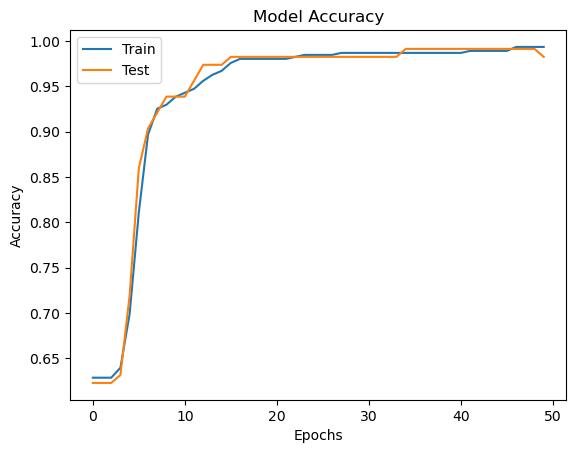

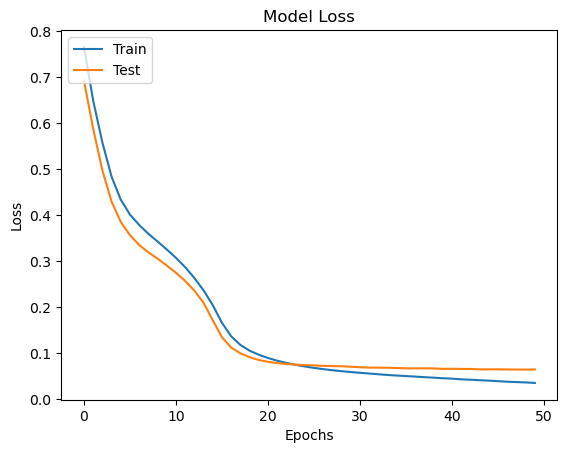

In [8]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# loss: compares predictions to actual labels
# accuracy: percentage (number) of correct predictions


In [9]:
# get predictions (thresholded at 0.5 for binary classification)
# .astype("int32") converts boolean values to 0 and 1
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

4/4 [==============================] - 0s 736us/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[42  1]
 [ 1 70]]


Confusion matrix breakdown:
- True Positives (TP): 42
- True Negatives (TN): 70
- False Positives (FP): 1 false alarm
- False Negatives (FN): 1 missed positive

## SECOND MODEL
Architecture of the network: more hidden layers
- Input layer: 16 neurons with relu activation
- Hidden layer 1: 8 neurons with relu activation
- Hidden layer 2: 8 neurons with relu activation
- Hidden layer 3: 8 neurons with relu activation
- Output layer: 1 neuron (binary classification) using sigmoid activation

Epoch 1/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.6286 - val_loss: 0.6487 - val_accuracy: 0.6228
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.6286 - val_loss: 0.5773 - val_accuracy: 0.6228
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.6286 - val_loss: 0.4821 - val_accuracy: 0.6228
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.6286 - val_loss: 0.4106 - val_accuracy: 0.6228
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.6286 - val_loss: 0.3671 - val_accuracy: 0.6228
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.6286 - val_loss: 0.3423 - val_accuracy: 0.6228
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.7033 - val_loss: 0.3282 - val_accuracy: 0.7719
Epoch 8/50
15/15 [==

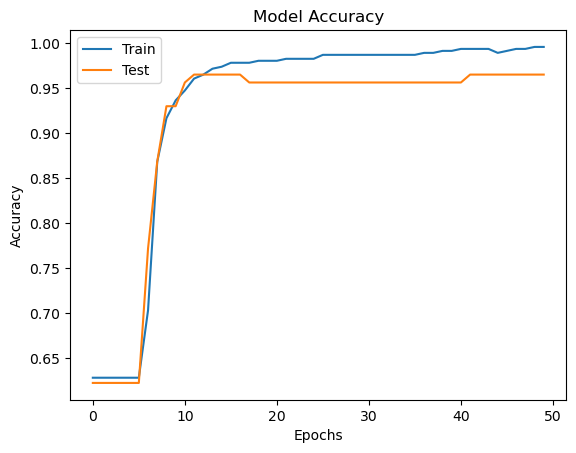

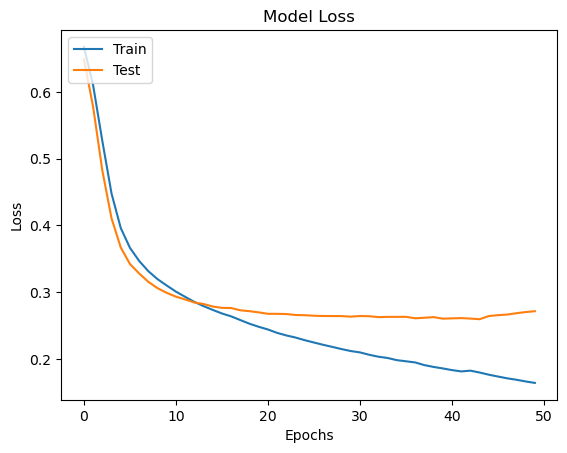

4/4 [==============================] - 0s 859us/step
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[39  4]
 [ 0 71]]


In [10]:
# prep data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize and train model
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

# evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Result: Overfitting due to added layers. The model would likely fail given new data sets

## THIRD MODEL
Architecture of the network: more neurons per layer
- Input layer: 64 neurons with relu activation
- Hidden layer 1: 32 neurons with relu activation
- Output layer: 1 neuron (binary classification) using sigmoid activation

Epoch 1/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.9077 - val_loss: 0.2812 - val_accuracy: 0.9649
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.9495 - val_loss: 0.1672 - val_accuracy: 0.9737
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9626 - val_loss: 0.1138 - val_accuracy: 0.9825
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9692 - val_loss: 0.0852 - val_accuracy: 0.9912
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9714 - val_loss: 0.0728 - val_accuracy: 0.9912
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9758 - val_loss: 0.0657 - val_accuracy: 0.9912
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9802 - val_loss: 0.0613 - val_accuracy: 0.9912
Epoch 8/50
15/15 [==

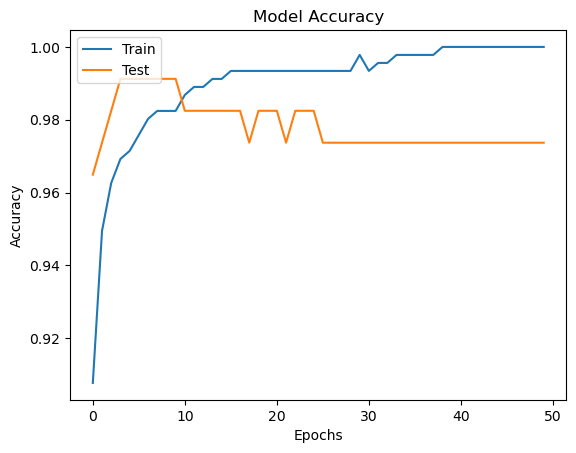

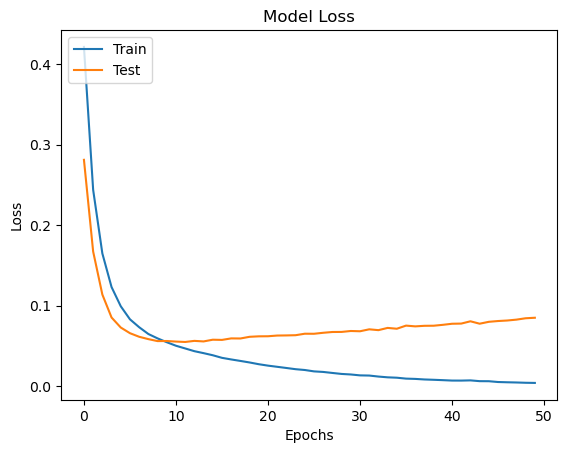

4/4 [==============================] - 0s 710us/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [11]:
# prep data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize and train model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

# evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

## FOURTH MODEL
Architecture of the network: activation function experimentation
- Input layer: 64 neurons with sigmoid activation
- Hidden layer 1: 32 neurons with sigmoid activation
- Output layer: 1 neuron (binary classification) using sigmoid activation

Epoch 1/50
15/15 [==============================] - 0s 5ms/step - loss: 1.1036 - accuracy: 0.3714 - val_loss: 0.8658 - val_accuracy: 0.3772
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.7582 - accuracy: 0.3714 - val_loss: 0.6390 - val_accuracy: 0.4123
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.7802 - val_loss: 0.5334 - val_accuracy: 0.9386
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.9099 - val_loss: 0.4725 - val_accuracy: 0.9035
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.9055 - val_loss: 0.4269 - val_accuracy: 0.8947
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.9143 - val_loss: 0.3868 - val_accuracy: 0.9298
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.9209 - val_loss: 0.3503 - val_accuracy: 0.9474
Epoch 8/50
15/15 [==

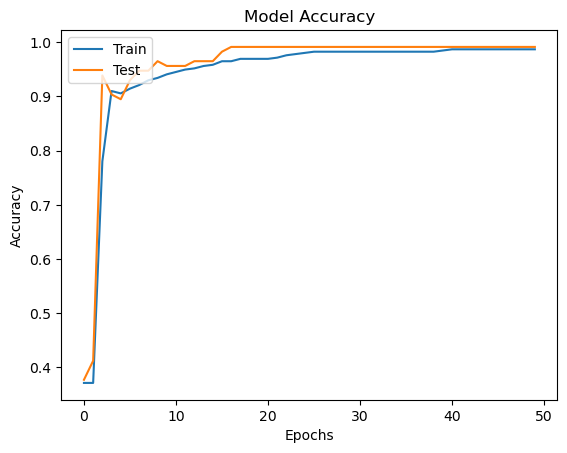

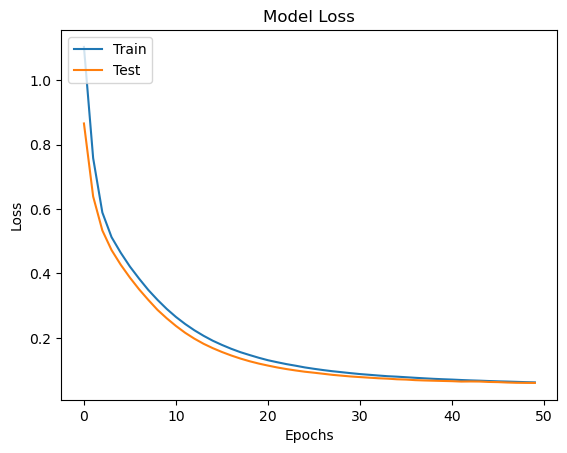

4/4 [==============================] - 0s 641us/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
 [[42  1]
 [ 0 71]]


In [27]:
# prep data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize and train model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'sigmoid'))
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

# evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Results: Surprisngly doesn't show signs of the vanishing gradient problem. Fit looks good!